In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [3]:
mnist = tf.keras.datasets.mnist #handwritten digits dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.3773334 , -0.6018182 ,  0.78983283,  0.48360234, -0.04156037,
         0.19749127,  0.36658546,  0.36866203,  0.28310853, -1.1473244 ]],
      dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.05826017, 0.04654566, 0.18718264, 0.13780703, 0.08150722,
        0.10351777, 0.12258902, 0.12284385, 0.11277115, 0.02697546]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy() #This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

2.268012

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2989 - accuracy: 0.9126
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1418 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1075 - accuracy: 0.9670
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0891 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0752 - accuracy: 0.9761


In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0717 - accuracy: 0.9783 - 699ms/epoch - 2ms/step


[0.07165024429559708, 0.9782999753952026]

In [14]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

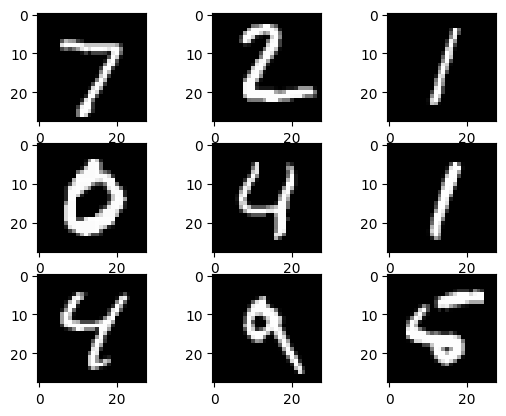

In [23]:
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [15]:
probability_model(x_test[:5]).numpy()

array([[2.75809509e-08, 1.23962707e-07, 1.09807070e-05, 3.43343017e-05,
        3.30659389e-10, 4.58621116e-07, 6.21642599e-11, 9.99951243e-01,
        1.43858301e-06, 1.45503680e-06],
       [9.06008546e-10, 4.42510282e-06, 9.99986172e-01, 9.19411286e-06,
        2.64791102e-16, 2.08830286e-07, 5.05710640e-10, 8.88117433e-13,
        7.89685206e-09, 8.28724893e-13],
       [1.07918247e-07, 9.98933613e-01, 7.65405057e-05, 4.90191724e-06,
        3.32175259e-05, 1.90159415e-06, 6.28347425e-06, 8.44694150e-04,
        9.85573133e-05, 1.76732499e-07],
       [9.99031663e-01, 6.05019920e-07, 3.48383997e-04, 1.33172143e-04,
        2.41867184e-08, 1.17887466e-04, 7.10153181e-05, 6.58526624e-05,
        7.57237285e-06, 2.23786643e-04],
       [1.01457699e-05, 2.65447775e-10, 2.41949529e-05, 1.84357646e-07,
        9.96830642e-01, 5.38951135e-05, 3.19844949e-05, 2.44307012e-04,
        3.96601581e-06, 2.80071213e-03]], dtype=float32)